In [4]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
from PIL import Image
import os

In [5]:
def openH5(filename):
    with h5py.File(filename, "r") as f:
        # List all groups
        print("Keys: %s" % f.keys())
        # Get the data
        header = list(f.keys())
        classes = f[header[0]]
        x = f[header[1]]
        y = f[header[2]]
        classes = np.array(classes)
        x = np.array(x)
        y = np.array(y)
        f.close()
    return classes, header, x, y

In [11]:
test_classes, test_header, X_test_orig, Y_test_orig = openH5("test_happy.h5")
train_classes, train_header, X_train_orig, Y_train_orig = openH5("train_happy.h5")

Keys: <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>
Keys: <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>


In [12]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

In [13]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600,)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150,)


In [14]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            
            ## Conv2D with 32 7x7 filters and stride of 1
            
            ## BatchNormalization for axis 3
            
            ## ReLU
            
            ## Max Pooling 2D with default parameters
            
            ## Flatten layer
            
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            
            # YOUR CODE STARTS HERE
            
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
            ## Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(32, (7,7)),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=-1),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D with default parameters
            tfl.MaxPool2D(),
            ## Flatten layer
            tfl.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(1, activation='sigmoid')
            # YOUR CODE ENDS HERE
        ])
    
    return model

In [16]:
happy_model = happyModel()
# Print a summary for each layer
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    

In [19]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [20]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

In [21]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 3s 56ms/step - loss: 0.9911 - accuracy: 0.7483
Epoch 2/10
38/38 [==============================] - 2s 59ms/step - loss: 0.1820 - accuracy: 0.9333
Epoch 3/10
38/38 [==============================] - 2s 58ms/step - loss: 0.1229 - accuracy: 0.9517
Epoch 4/10
38/38 [==============================] - 2s 66ms/step - loss: 0.1004 - accuracy: 0.9683
Epoch 5/10
38/38 [==============================] - 2s 64ms/step - loss: 0.0926 - accuracy: 0.9733
Epoch 6/10
38/38 [==============================] - 2s 64ms/step - loss: 0.1362 - accuracy: 0.9600
Epoch 7/10
38/38 [==============================] - 2s 59ms/step - loss: 0.1148 - accuracy: 0.9583
Epoch 8/10
38/38 [==============================] - 2s 57ms/step - loss: 0.2735 - accuracy: 0.9133
Epoch 9/10
38/38 [==============================] - 2s 55ms/step - loss: 0.1447 - accuracy: 0.9450
Epoch 10/10
38/38 [==============================] - 2s 55ms/step - loss: 0.1203 - accuracy: 0.9583


In [22]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 27ms/step - loss: 0.3728 - accuracy: 0.8867


[0.3728439509868622, 0.8866666555404663]

In [23]:
# Loading the data (signs)
test_classes, test_header, X_test_orig, Y_test_orig = openH5("test_signs.h5")
train_classes, train_header, X_train_orig, Y_train_orig = openH5("train_signs.h5")

Keys: <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>
Keys: <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>


y = 4


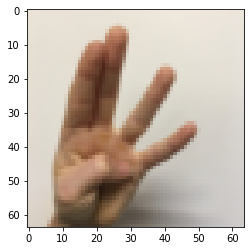

In [24]:
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[index])))

In [25]:
def convert_to_one_hot(y, C):
    return np.eye(C)[y.reshape(-1)].transpose()

In [26]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [27]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    # Z1 = None
    ## RELU
    # A1 = None
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    # P1 = None
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    # Z2 = None
    ## RELU
    # A2 = None
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    # P2 = None
    ## FLATTEN
    # F = None
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    # outputs = None
    # YOUR CODE STARTS HERE
    Z1 = tfl.Conv2D(8, 4, activation='linear', padding="same", strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(16, 2, activation='linear', padding="same", strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [28]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_2 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 69ms/step - loss: 1.7981 - accuracy: 0.1713 - val_loss: 1.7903 - val_accuracy: 0.1833
Epoch 2/100
17/17 [==============================] - 1s 54ms/step - loss: 1.7897 - accuracy: 0.2130 - val_loss: 1.7857 - val_accuracy: 0.2417
Epoch 3/100
17/17 [==============================] - 1s 59ms/step - loss: 1.7860 - accuracy: 0.2481 - val_loss: 1.7827 - val_accuracy: 0.2750
Epoch 4/100
17/17 [==============================] - 1s 55ms/step - loss: 1.7827 - accuracy: 0.2741 - val_loss: 1.7796 - val_accuracy: 0.2833
Epoch 5/100
17/17 [==============================] - 1s 52ms/step - loss: 1.7790 - accuracy: 0.2769 - val_loss: 1.7754 - val_accuracy: 0.2500
Epoch 6/100
17/17 [==============================] - 1s 53ms/step - loss: 1.7743 - accuracy: 0.2778 - val_loss: 1.7707 - val_accuracy: 0.2750
Epoch 7/100
17/17 [==============================] - 1s 48ms/step - loss: 1.7678 - accuracy: 0.3139 - val_loss: 1.7639 - val_accuracy: 0.3333
Epoch 

In [30]:
history.history

{'loss': [1.7981340885162354,
  1.7897050380706787,
  1.7860379219055176,
  1.7827001810073853,
  1.7790040969848633,
  1.7743405103683472,
  1.7677605152130127,
  1.7601453065872192,
  1.7511073350906372,
  1.7403738498687744,
  1.7265766859054565,
  1.7099746465682983,
  1.690778136253357,
  1.6670490503311157,
  1.638471245765686,
  1.6050513982772827,
  1.5677353143692017,
  1.5269629955291748,
  1.485793113708496,
  1.44405996799469,
  1.4021241664886475,
  1.3612453937530518,
  1.3211781978607178,
  1.282164454460144,
  1.245144009590149,
  1.2082703113555908,
  1.1733009815216064,
  1.1394423246383667,
  1.1080713272094727,
  1.0771504640579224,
  1.0464972257614136,
  1.0181103944778442,
  0.9913522005081177,
  0.9644966125488281,
  0.938937783241272,
  0.914527416229248,
  0.8909457921981812,
  0.8674748539924622,
  0.8451640009880066,
  0.8215478658676147,
  0.799331784248352,
  0.7790395021438599,
  0.7592613697052002,
  0.740577220916748,
  0.7234246730804443,
  0.706987619

C:\Users\engrb\AppData\Local\Temp\ipykernel_4440\974158325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\engrb\AppData\Local\Temp\ipykernel_4440\974158325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

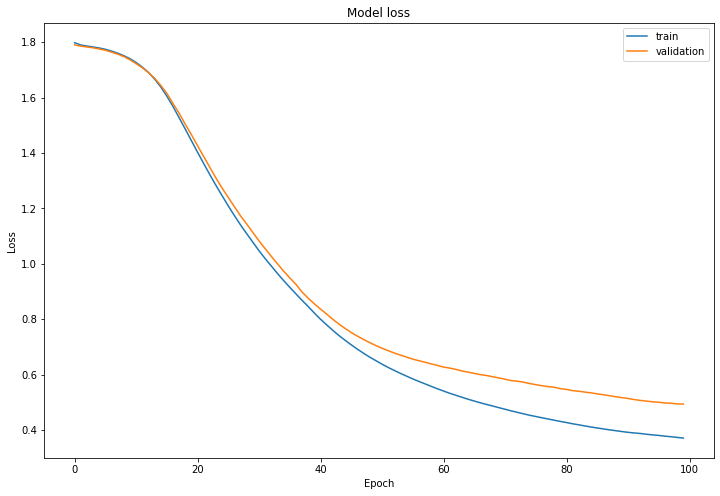

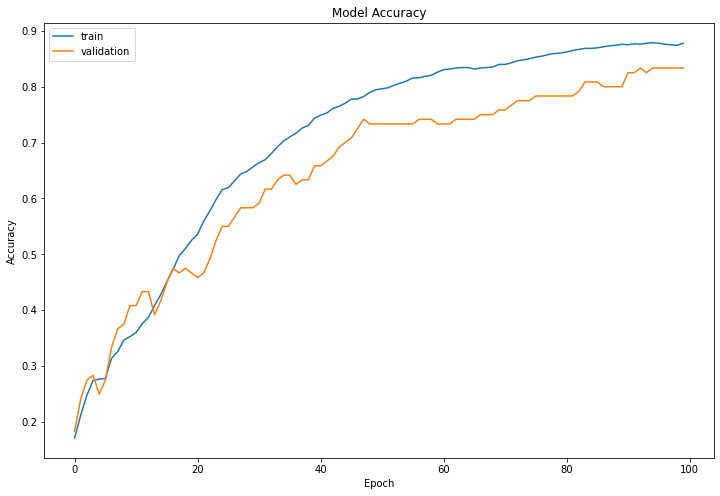

In [31]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')